#### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave
or not in the next 6 months.

#### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers
leaving and joining another service provider. It is important to understand which aspects of the service
influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities.

#### Data Description:
The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore,
Geography, Gender, Age, Tenure, Balance etc.

#### Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

git repo: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-bunty-sunbird/tree/master/project/BankChurn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data read and structuring
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# profiling
# import pandas_profiling

# model building
# from sklearn.linear_model import LogisticRegression

# data preparing
from sklearn.model_selection import train_test_split

# check error values
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# custom display output
# from IPython.display import display, HTML

# import scipy.stats as stats

# scalars to normalize and impute
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import RobustScaler

%matplotlib inline

sns.set(color_codes=True)

In [3]:
df = pd.read_csv('bank.csv')

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.shape


(10000, 14)

In [9]:
# Observation of the describe data

#
# No numeric data is less than 0 and are in valid range i.e. Age, Tenure, NumOfProducts and NumOfProducts are not 
# negative
# 
# Age is right skewed 
#
# Balance is not evenly distributed and have a high value on lower balance
#
# The Exited data is also not balance, we can upscale the Exited:0 or downscale Exited: 1 data
# 

In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=0, inplace=True)

## EDA

In [11]:
# categorical_cols = ['Geography', 'Gender']

In [12]:
#for col in categorical_cols:
#    df[col] = df[col].astype('category')

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
#
# perform one-hot encoding and drop of the one hot encoded feature since the data in the other features implicitly 
# have the information
#

# df = pd.get_dummies(df, drop_first=True)

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
# check null or missing values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# No missing values

In [18]:
# Check if age is valid
df[df.Age <= 0].Age.count()

0

In [19]:
# all Age are valid

In [20]:
# Check if tenure is valid
df[df.Tenure < 0].Tenure.count()

0

In [21]:
# All tenure is valid

In [22]:
# find any duplicates
# Find any duplicates

df[df.duplicated(keep="last")]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [23]:
# No duplicates

### BiVariate Plots

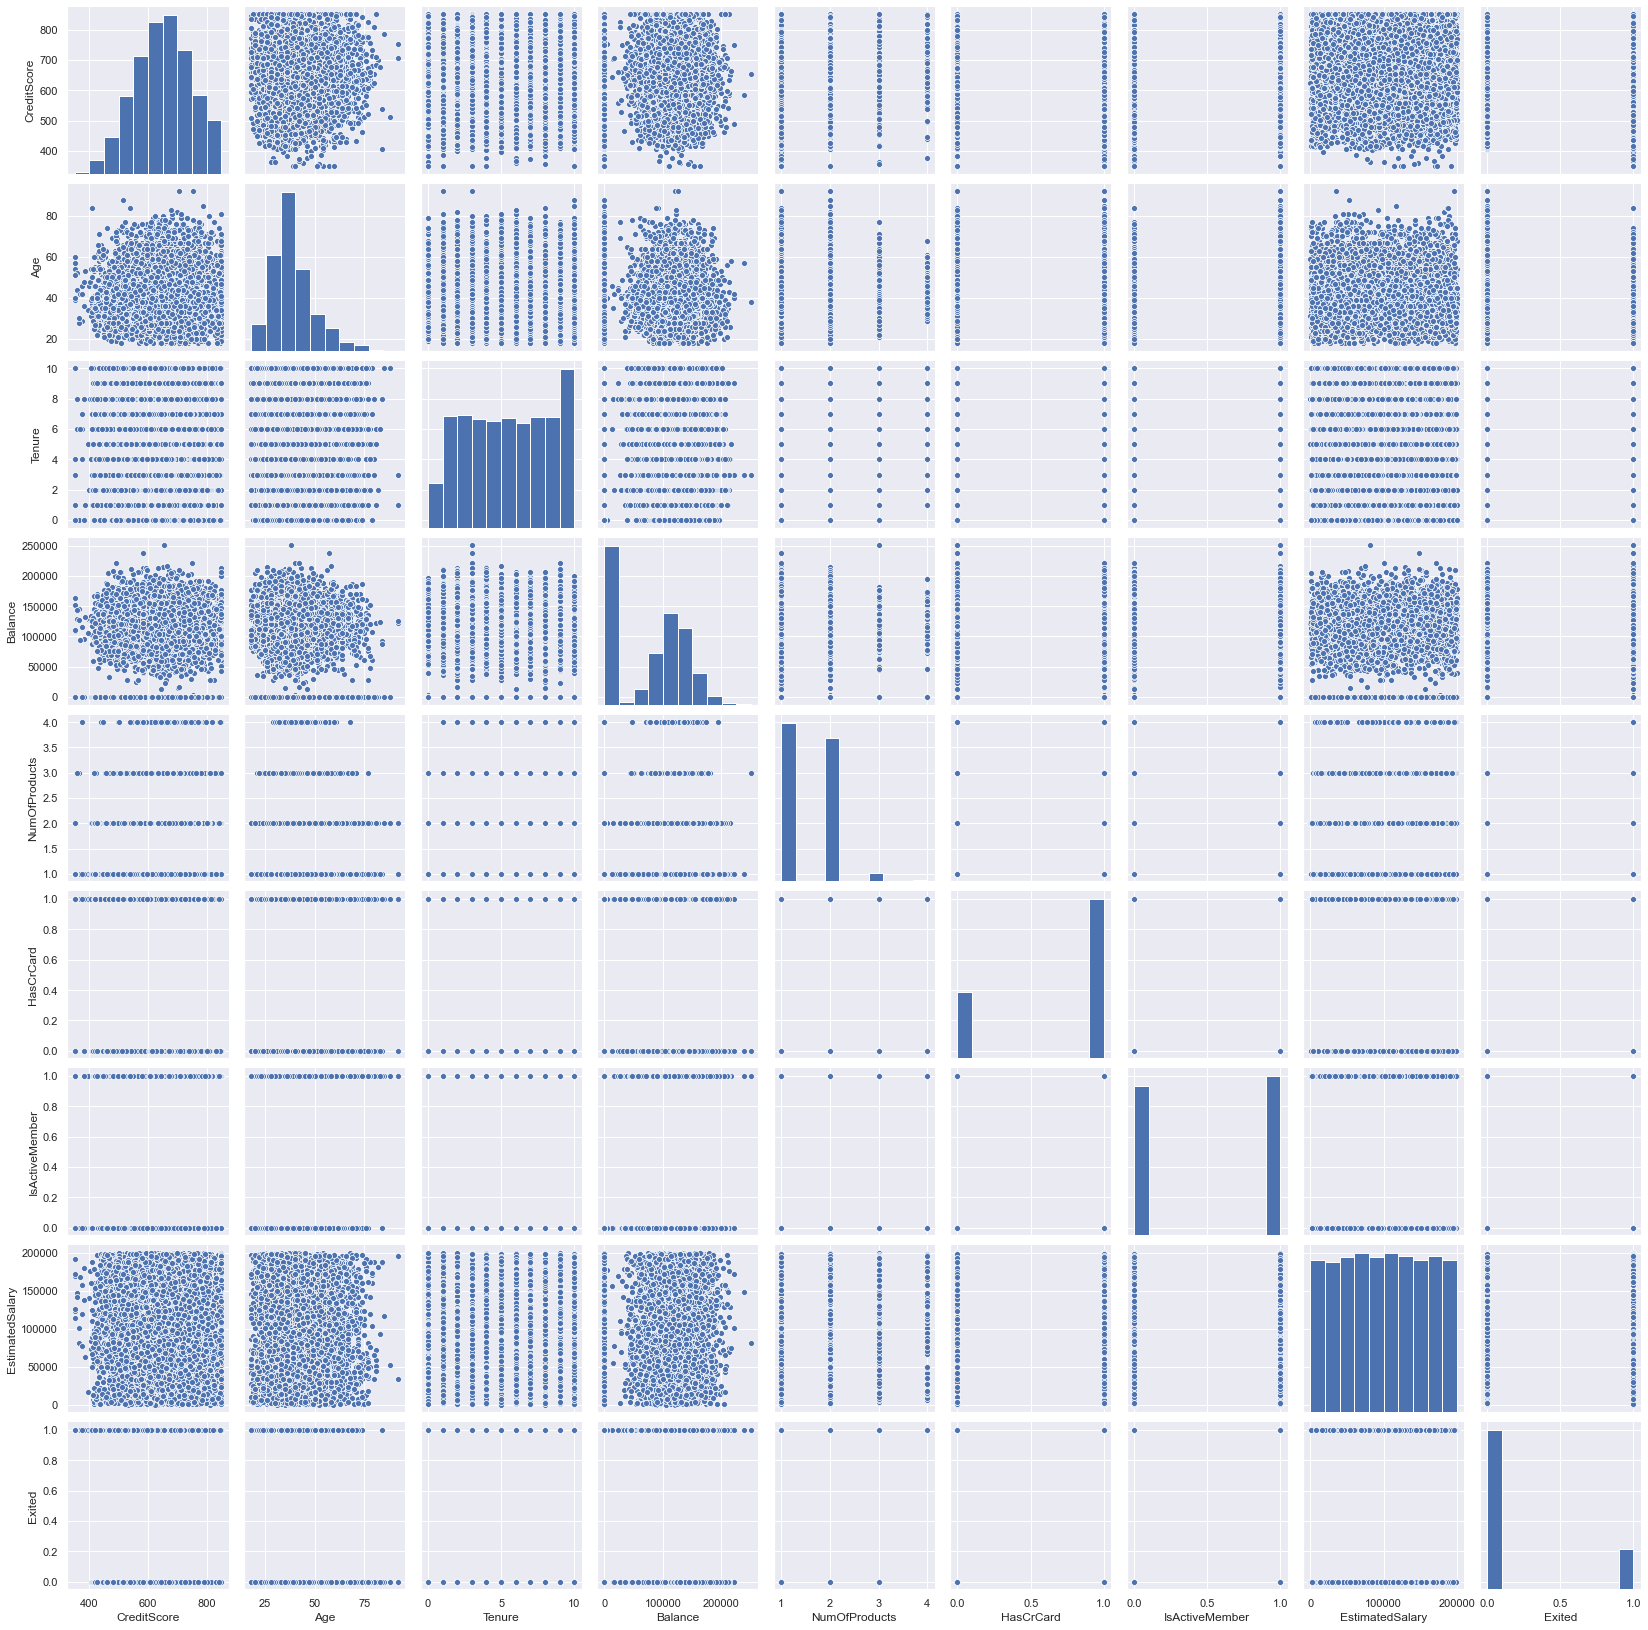

In [24]:
sns.pairplot(df)

In [25]:
# Observation

# The scatter plot and do not show any strong relations between the independent variables. Most of it is a cloud 
#     like relation and cannot find anything that can be a canditate to drop.
# The distribution (diagonal) plots for Credit Score, Age and Balanace shows some skewness 
#     but not to an extended that it needs to be treated
# 'Estimated salary', 'Active Memeber' have a good mix and well balanced data.
# 

# We can further use the correlation data to find any strong relations between the features to eliminate it

In [26]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


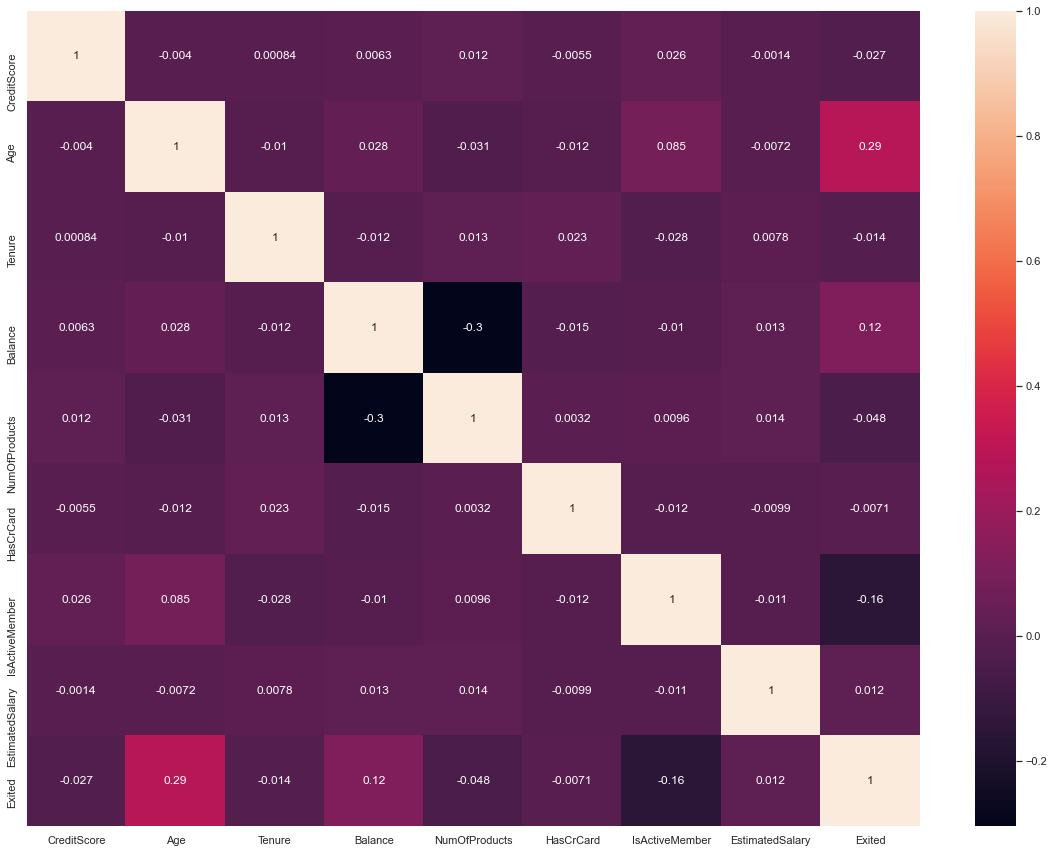

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [28]:
# Let us also include the categorical variables to find any good relation between the independent features


In [29]:
categorical_cols = ['Geography', 'Gender']

In [30]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [31]:
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [32]:
#
# perform one-hot encoding and drop of the one hot encoded feature since the data in the other features implicitly 
# have the information
#

df = pd.get_dummies(df, drop_first=True)

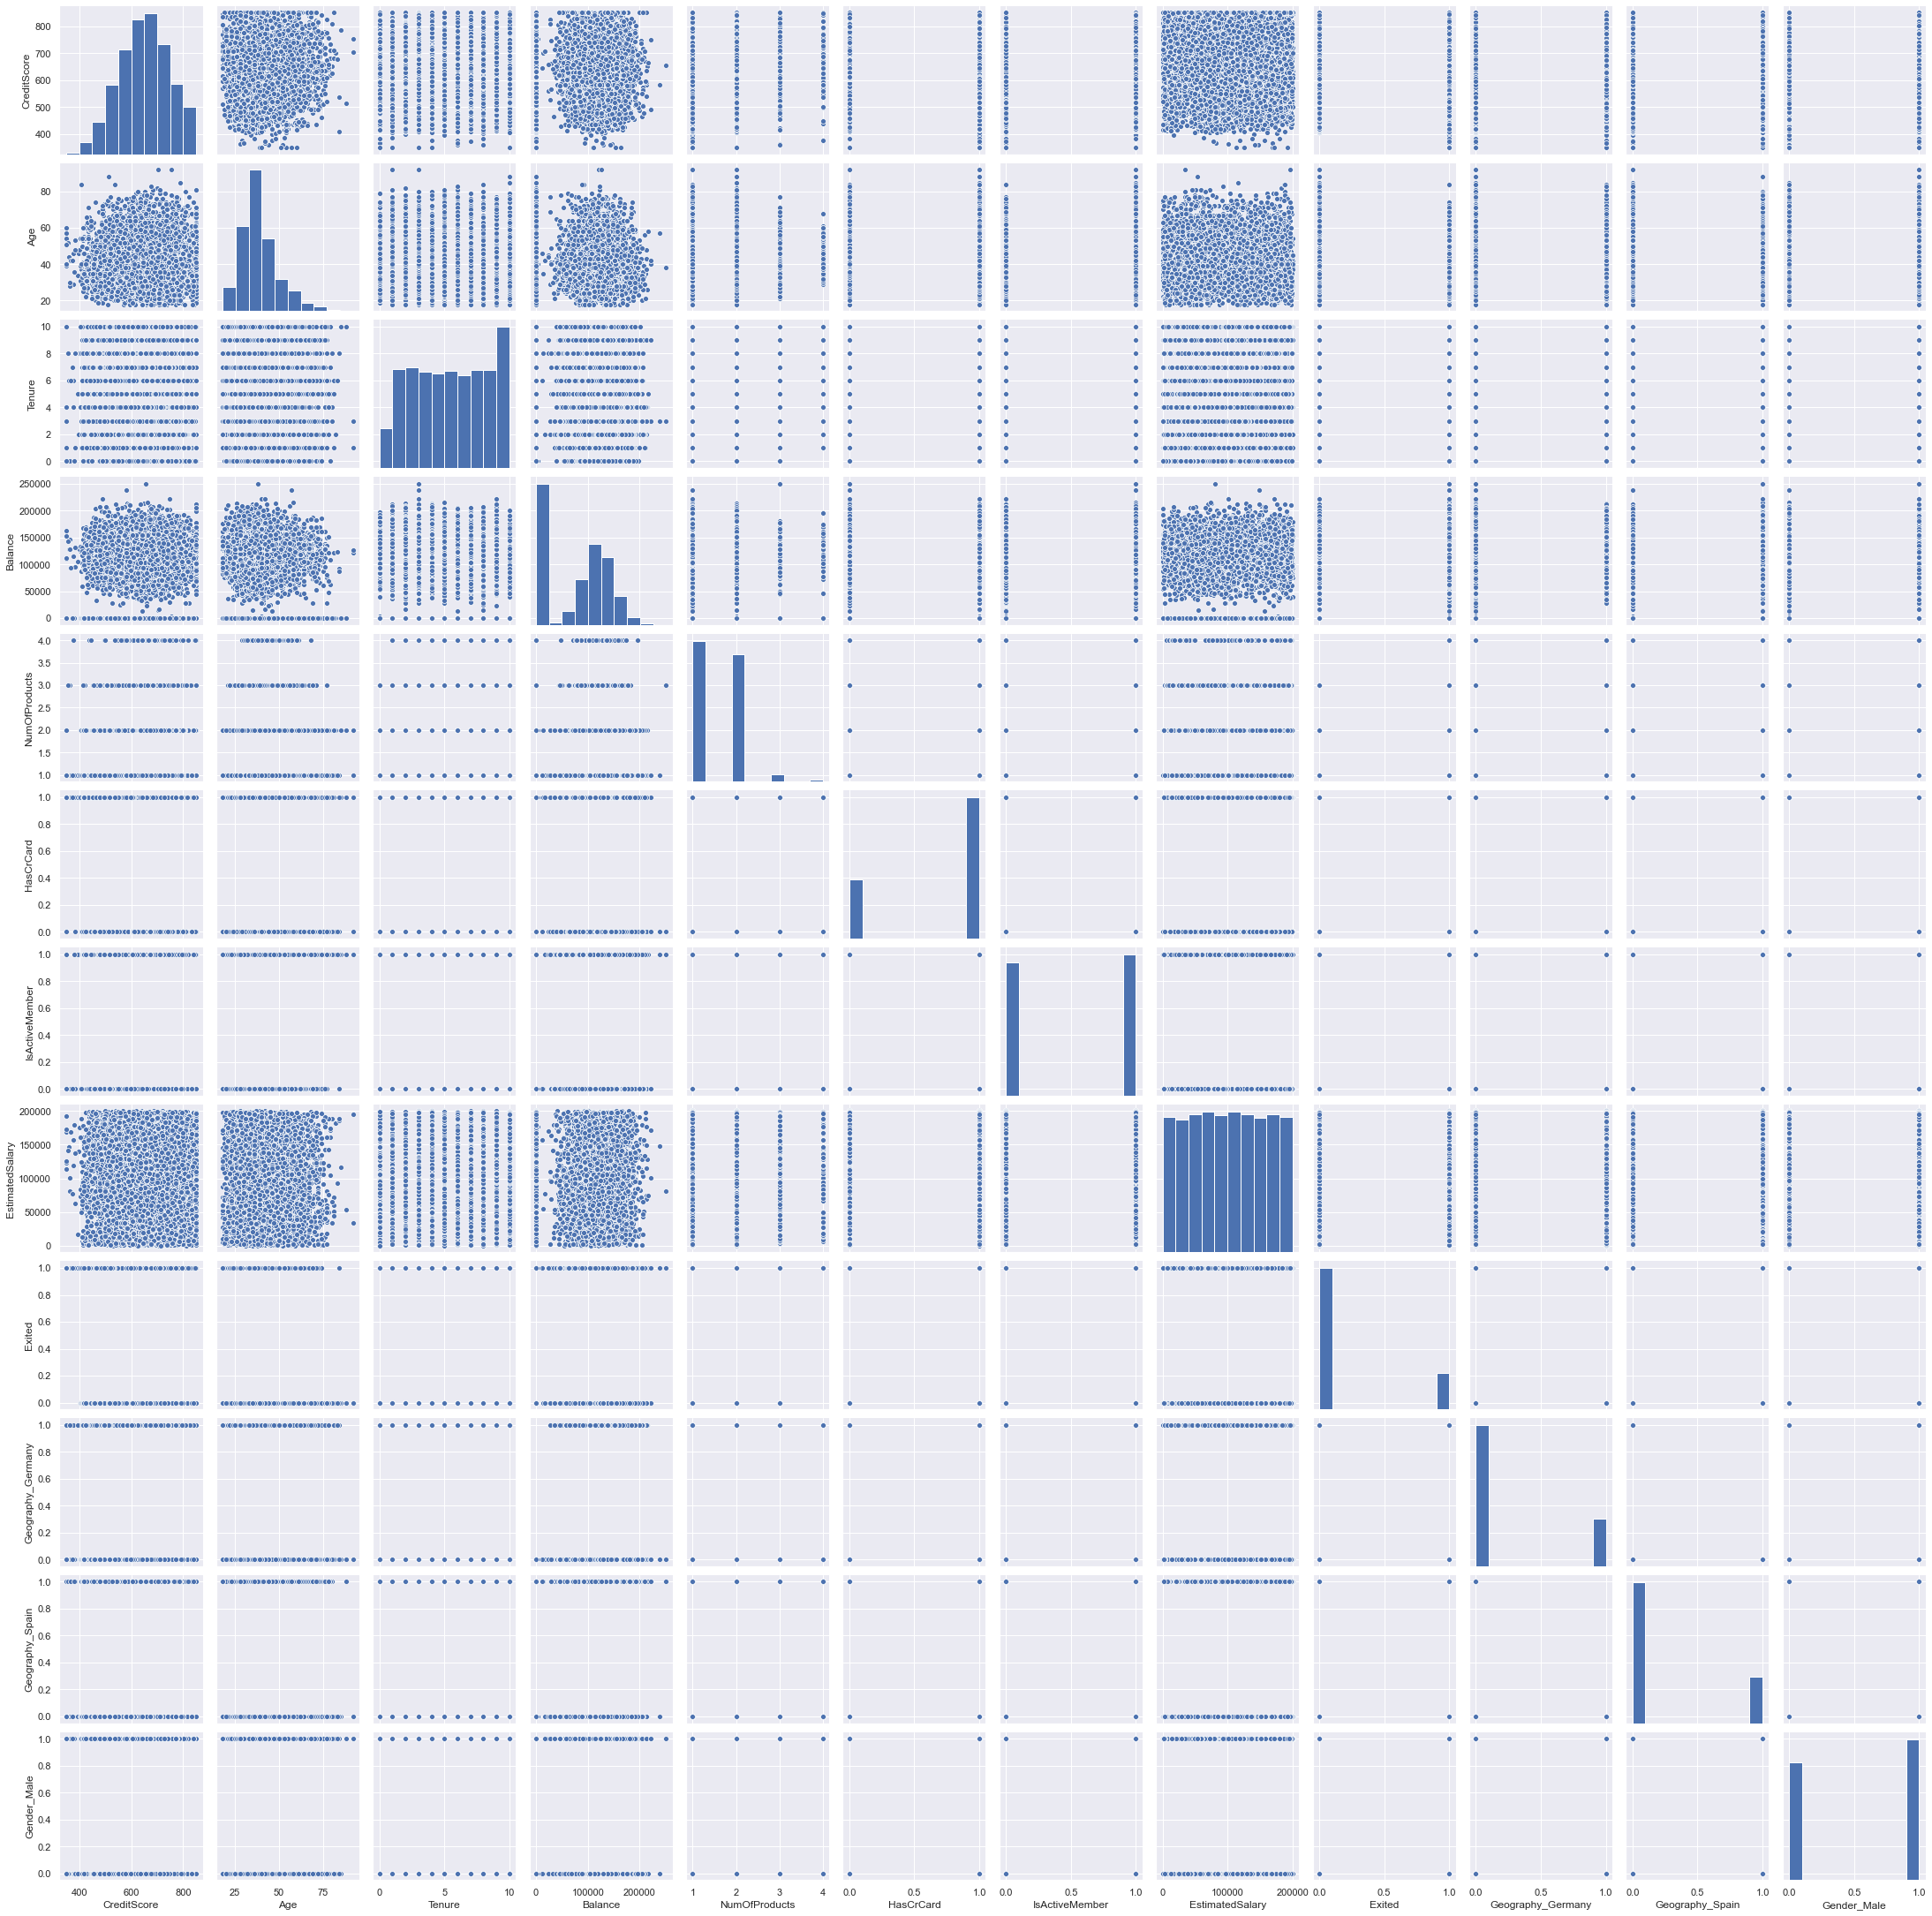

In [33]:
sns.pairplot(df)

In [34]:
# Observation with the categorical (one-hot encoded) feature also shows not good relation between them and other
# independent features

In [35]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


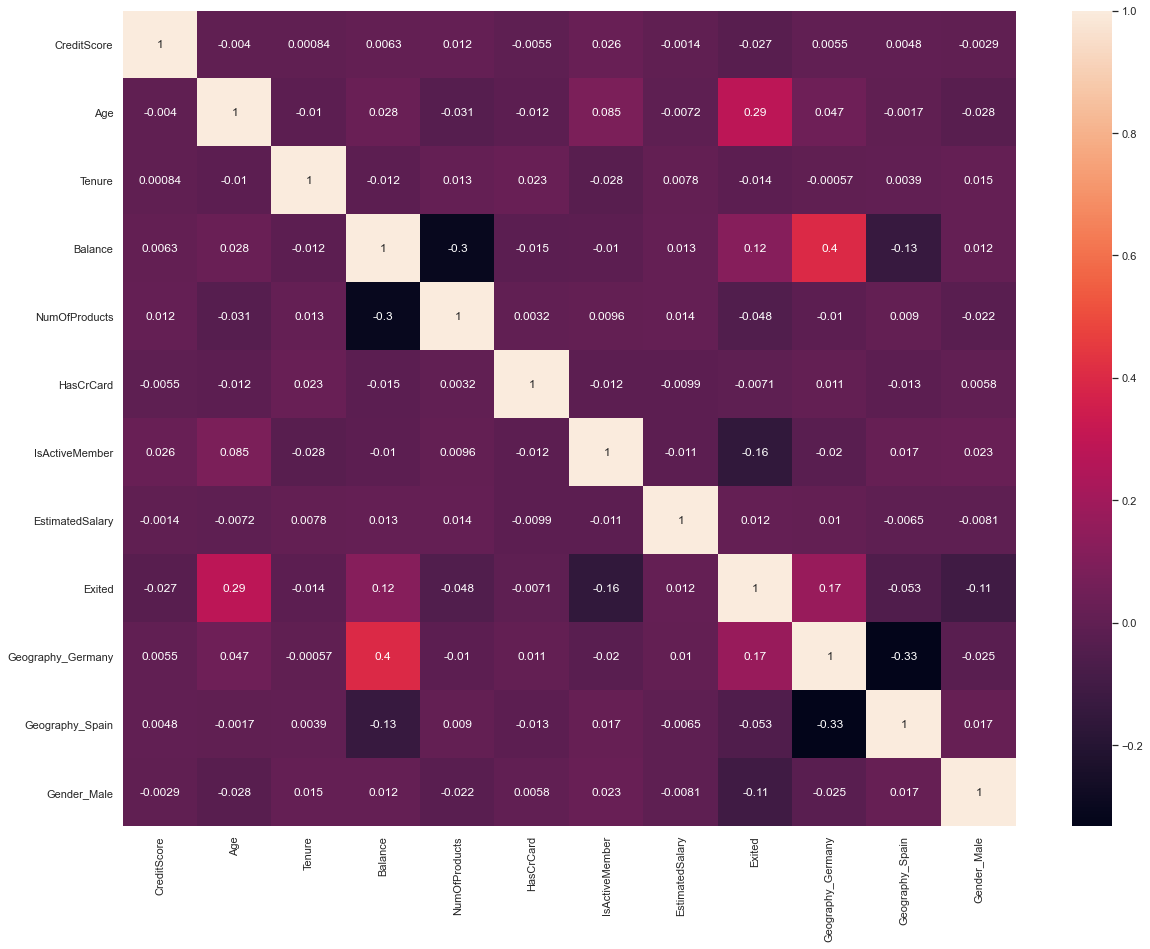

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [37]:
# As was seen above, even with the correlation no strong correlation between the categorical and other features

In [38]:
# Observation

# No good correlation between independent variables that can be used to eliminate

# Lets use PCA to find it with less number of components, we can cover upto 95% or more of variance

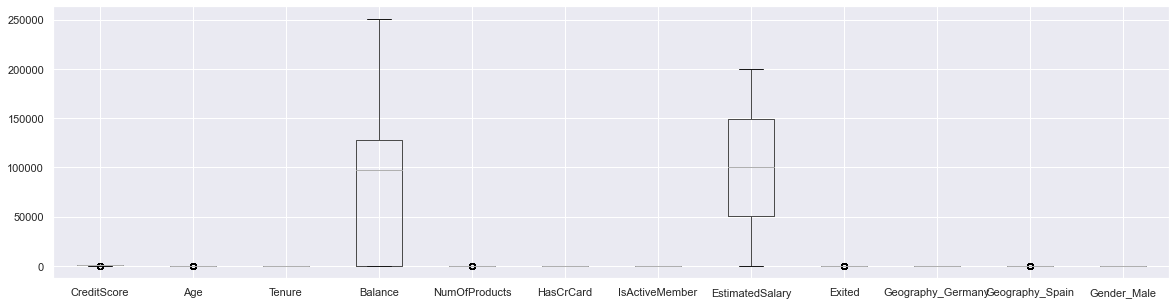

In [39]:
df.boxplot(figsize=(20,5))

In [40]:
# Not many outliers that can influence the PCA Analysis

### EDA Analysis

In [41]:
def box_independent_hue(independent):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=df, x = 'Target', y = independent);
    plt.show()

def box_independent(independent):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=df, x = independent);
    plt.show()
    
def dist_plot(independent, skip_dist_plot=False):
    if skip_dist_plot:
        return
    plt.figure(figsize=(10,7))
    sns.distplot(df[independent]);

def dist_plot_hue(independent):
    plt.figure(figsize=(10,7))
    # sns.countplot(x=independent, hue='Target', data=df);
    plt.hist(df[independent], density=True)
    
def density_plot(independent, dependent):
    sns.distplot(df[df[dependent]=='no'][independent],color='r',label=0)
    sns.distplot(df[df[dependent]=='yes'][independent],color='g',label=1)
    plt.legend()
    plt.show()
    
def univariant_contineous(independent, dependent, skip_dist_plot=False):
    # density_plot(independent, dependent)
    box_independent(independent)
    # box_independent_hue(independent)
    dist_plot_hue(independent)
    dist_plot(independent, skip_dist_plot)

In [42]:
# Check for any outliers

In [43]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

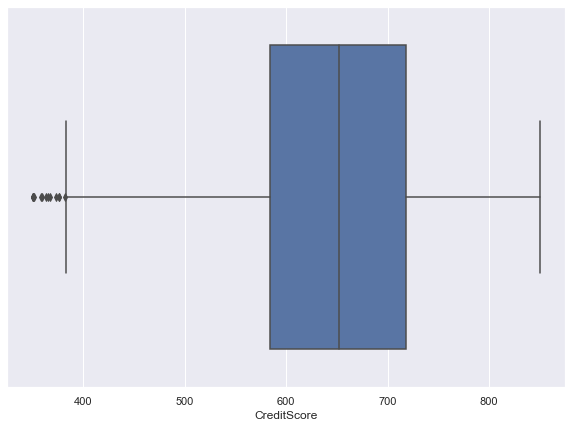

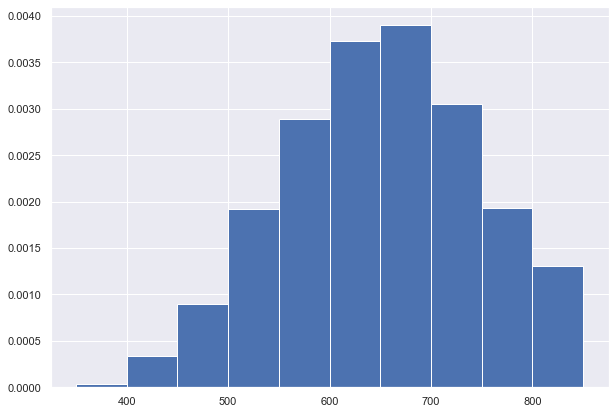

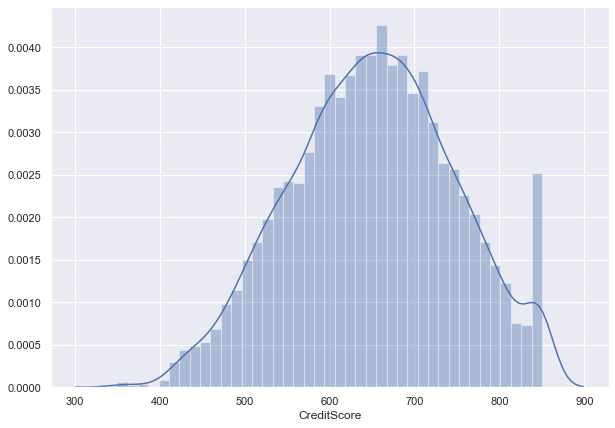

In [44]:
univariant_contineous('CreditScore', 'Exited')

In [45]:
# df['CreditScore'] = np.log(df['CreditScore'])

In [46]:
# univariant_contineous('CreditScore', 'Exited')

In [47]:
# Before applying PCA, split the dependent and independent features
# independant variables
X = df.drop(['Exited'], axis=1)
# the dependent variable
y = df[['Exited']]

### Normalize the data

In [48]:
# Scale/Normalize the data, make it unitless and also help apply PCA
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


In [49]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00010001e+00 -3.96530206e-03  8.42026021e-04  6.26900852e-03
   1.22391032e-02 -5.45902800e-03  2.56538887e-02 -1.38443131e-03
   5.53810642e-03  4.78024830e-03 -2.85690581e-03]
 [-3.96530206e-03  1.00010001e+00 -9.99782537e-03  2.83111994e-02
  -3.06831563e-02 -1.17222012e-02  8.54806935e-02 -7.20176255e-03
   4.69017413e-02 -1.68553788e-03 -2.75467473e-02]
 [ 8.42026021e-04 -9.99782537e-03  1.00010001e+00 -1.22551517e-02
   1.34451000e-02  2.25851258e-02 -2.83649143e-02  7.78460392e-03
  -5.67554480e-04  3.86882347e-03  1.47345265e-02]
 [ 6.26900852e-03  2.83111994e-02 -1.22551517e-02  1.00010001e+00
  -3.04210159e-01 -1.48598309e-02 -1.00851089e-02  1.27987762e-02
   4.01150360e-01 -1.34905401e-01  1.20877774e-02]
 [ 1.22391032e-02 -3.06831563e-02  1.34451000e-02 -3.04210159e-01
   1.00010001e+00  3.18346434e-03  9.61283720e-03  1.42056157e-02
  -1.04200490e-02  9.03991110e-03 -2.18607537e-02]
 [-5.45902800e-03 -1.17222012e-02  2.25851258e-02 -1.48598309e-02
   3.18346434e-03  

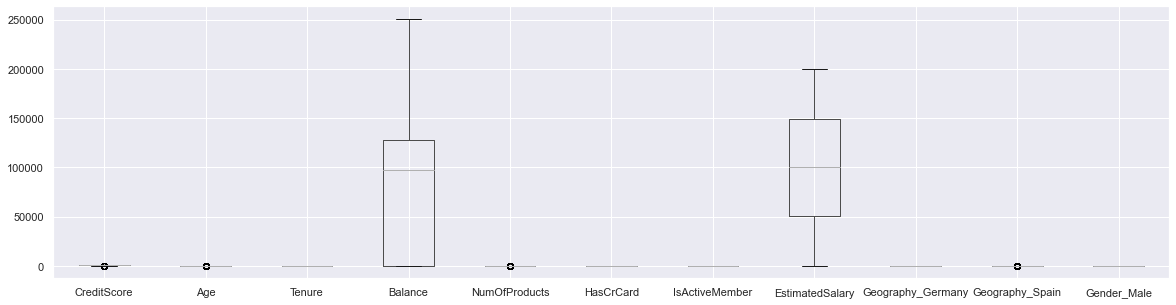

In [50]:
X.boxplot(figsize=(20,5))

### Apply PCA for find if any features can be eliminated

- Since from the bivariant analysis, we did not find any strong correlations between independent features, we will try and use PCA 

In [51]:
# Not many outliers that can influence the PCA

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca.fit(XScaled)

PCA(n_components=11)

The eigen Values

In [53]:
print(pca.explained_variance_)

[1.65489091 1.13644642 1.09469677 1.02337284 1.00743081 0.99922181
 0.98964391 0.97156695 0.88983525 0.75851431 0.47548012]


The eigen Vectors

In [54]:
print(pca.components_)

[[-2.99330063e-04 -8.02870744e-02  2.02949696e-02 -5.98142782e-01
   2.97037821e-01 -1.57564756e-03  3.29537186e-02 -1.85913361e-02
  -5.98445026e-01  4.32717904e-01  1.79012175e-02]
 [-1.09264960e-02 -2.77177086e-01  1.67274614e-01 -2.55400805e-01
   6.27181632e-01  1.66233326e-01 -2.99973560e-01  1.31597552e-01
   2.67882949e-01 -4.34923842e-01 -2.01570616e-01]
 [ 1.83044320e-01  5.53488913e-01 -2.48384252e-01 -1.42323245e-01
   3.37550024e-01 -1.49136296e-01  5.83900796e-01 -4.27647445e-02
   1.35198383e-01 -1.64227775e-01 -2.32366471e-01]
 [-1.70182759e-01 -6.95972499e-02 -4.01120780e-01  3.10321128e-02
  -6.75244232e-02 -5.55930338e-01 -2.85101967e-01  3.81285178e-01
  -5.17650639e-02  8.03949590e-02 -5.04886721e-01]
 [ 7.29182873e-01 -2.68610181e-01  7.18873607e-02  5.04223615e-02
   5.78664220e-02 -3.48571059e-01  1.02657072e-01  3.73935530e-01
   2.28412603e-02  1.95139852e-03  3.35691241e-01]
 [-2.23380937e-01  3.55591583e-01  5.77408844e-01  2.29463924e-02
  -4.76700428e-02  

And the percentage of variation explained by each eigen Vector

In [55]:
print(pca.explained_variance_ratio_)

[0.15042958 0.10330298 0.09950794 0.09302459 0.09157546 0.09082926
 0.08995863 0.08831544 0.08088602 0.06894895 0.04322114]


In [56]:
# Even the most insignificant feature is contributing 4% to the target and therefore not feasible to drop any feature

# Even if we were to decide that 95% of the variance is good enough, we will end up dropping only 1 feature

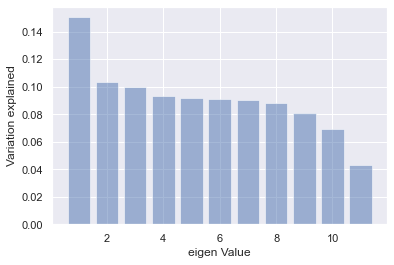

In [57]:
plt.bar(list(range(1,12)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

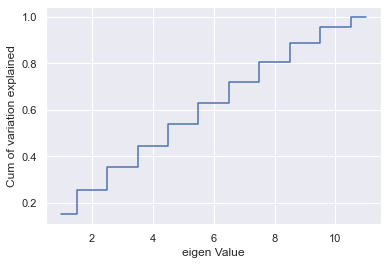

In [58]:
plt.step(list(range(1,12)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [59]:
# As can be seen even with 10 out of 11 features cannot explain 95% of the variance. Therefore, we will keep all the 
# independent fearuees because all features are fairly independent and required to predeict the target variable i.e. 
# 'Exited'

## Split the data

In [60]:
# 
# We have already applied the zscore scaling and normalized the data (XScaled), 
# Treated and cleaned the data (checked missing values, duplicate values, incorrect values ...)
# Applied one-hot encoding to the categorical independent variable
# Verified that the features cannot be reduced using pairplots, correlation and PCA
#

#
# Now the data is ready to be split
# Let us use 80/20 split to get the train and test data
# We will further split the train data to have a validation set to validate the model before evaluating the model
# on the test data
# 

X = XScaled.values  
Y = y.values  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


## Building the ANN 
Let us start with a very conservative hyperparameters, later we will play the hyperparameter to get to the 
optimal hyper parameters

In [65]:
# Using Tensorflow Keras instead of the original Keras

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report
from sklearn.metrics import roc_curve
from tensorflow.keras.optimizers import SGD, Adam, Nadam, Adagrad, Adadelta, Adamax, RMSprop

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

# This API will fit the model with the provided hyperparameters (defaults are the function default)
# It uses the threshold of 0.5 to predict on the test data
# It uses 2 hidden layers with the provided activation, initializer, optimizer etc
# It also calculate the model performance and provides scores like ROC, AUC, Precision, Recall, 
#    confusion matrix plot, model convergance plots on train and validation 
def fit_predict_analyze(k_init='normal', act_method='relu', learn_rate=0.01, momentum=0.0, 
                       epoch_size=100, val_split=0.2, batch_size=256, optimizer_name='Adam'):
    
    #
    # We will use 2 hidden layers to fit the model
    # 
     
    # Initialize the constructor
    model = Sequential()

    # Add an first hidden layer 
    model.add(Dense(20, activation=act_method, kernel_initializer=k_init, input_dim = X_train.shape[1]))
    # model.add(Dropout(0.1))

    # second hidden layer
    model.add(Dense(10, activation=act_method, kernel_initializer=k_init))
    # model.add(Dropout(0.1))

    # Add an output layer with one neuron and no activation specified since we have a binary classification
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(0.001)
    # Select the optimizer
    if optimizer_name == 'SGD':
        optimizer = SGD(lr=learn_rate, momentum=momentum)
    elif optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learn_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=learn_rate, momentum=momentum)
    elif optimizer_name == 'Adagrad':
        optimizer = Adagrad(learning_rate=learn_rate)
    elif optimizer_name == 'Adadelta':
        optimizer = Adadelta(learning_rate=learn_rate)
    elif optimizer_name == 'Adamax':
        optimizer = Adamax(learning_rate=learn_rate)
    elif optimizer_name == 'Nadam':
        optimizer = Nadam(learning_rate=learn_rate)
    else:
        optimizer = Adam(learning_rate=learn_rate)
    
    # Compiling the NN
    # binary_crossentropy loss function used when a binary output is expected
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy']) 

    # Fit the model
    history = model.fit(X_train, y_train, epochs=epoch_size, validation_split=val_split, 
                        batch_size=batch_size, verbose=0)

    hist  = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    # plot train and validate conversion
    
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.legend(("train" , "valid") , loc =0)
    plt.show()

    # plot loass and accuracy for train and validation data
    hist.plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    # print test accuracy
    test_accuracy = model.evaluate(X_test, y_test, verbose=False)
    print("test accuracy:", test_accuracy)
    
    # get prediction
    y_pred = model.predict_classes(X_test)
    
    # apply manual threshold of 0.5 for the predicted data
    Y_pred = model.predict(X_test) > 0.5  # manual threshold
    
    # calculate confusion matrix
    matConf = confusion_matrix(y_test, Y_pred)
    
    ## plot the confusion matrix heat map
    # plt.figure(figsize=(6, 5))  # Establishing the heatmap size before plotting
    # ax = sns.heatmap(matConf, annot=True, fmt=".0f")
    # ax.set_ylabel('Original', fontsize=15)
    # ax.set_xlabel('Predicted', fontsize=15)
    # plt.title("Imbalanced data")
    # plt.show()
    
    # show ROC
    #AUC ROC curve
    logit_roc_auc = roc_auc_score(y_test, Y_pred)
    pred = model.predict(X_test).ravel() 
    fpr, tpr, thresholds = roc_curve(y_test, pred)  # False positive rate, true positive rate, threshold


    # fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    # print classification report
    print(classification_report(y_test, Y_pred))
    
    # show the model scores
    train_eval = model.evaluate(X_train,y_train, verbose=0)
    print("Training accuracy",train_eval)
    print()
    test_eval = model.evaluate(X_test, y_test, verbose=0)
    print("Testing accuracy", test_eval)
    print()
    print('Confusion Matrix')
    print(draw_cm(y_test,Y_pred))
    print()
    print("Recall:",recall_score(y_test,Y_pred))
    print()
    print("Precision:",precision_score(y_test,Y_pred))
    print()
    print("F1 Score:",f1_score(y_test,Y_pred))
    print()
    print("Roc Auc Score:",roc_auc_score(y_test,Y_pred))
    
    return hist

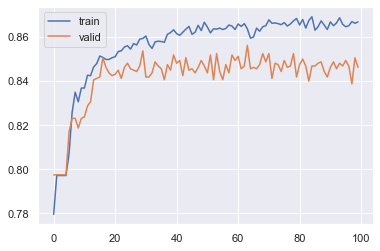

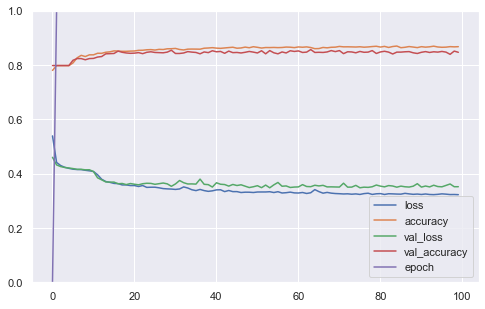

test accuracy: [0.34450663018226624, 0.856]


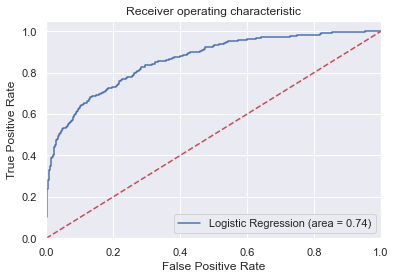

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1585
           1       0.70      0.54      0.61       415

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Training accuracy [0.32771742349863053, 0.862875]

Testing accuracy [0.34450663018226624, 0.856]

Confusion Matrix


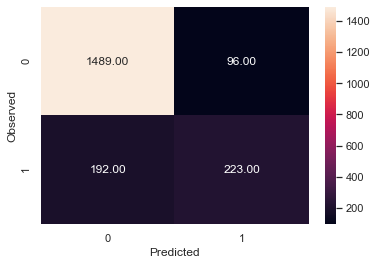

None

Recall: 0.5373493975903615

Precision: 0.6990595611285266

F1 Score: 0.6076294277929155

Roc Auc Score: 0.7383907871232563


In [66]:
#
# We will fit the model with default hyperparameter as follows:
# kernel_initializer='normal', 
# activation_method='relu', 
# learning_rate=0.01, 
# momentum=0.0, 
# epoch_size=100, 
# validation_split=0.2, 
# batch_size=256

hist = fit_predict_analyze()

In [67]:
# 
# We got a training and test accuracy of approximately 0.86
# 

#
# Observation of the confusion matrix
#
# True Positives (TP): we correctly predicted that they will take personal loans 223
# True Negatives (TN): we correctly predicted that they will not take personal loan 1489
# False Positives (FP): we incorrectly predicted that they will take exit (a "Type I error") 96 Falsely predict positive Type I error
# False Negatives (FN): we incorrectly predicted that they will not take exit (a "Type II error") 192 Falsely predict negative Type II error

# We shall make sure that the model shall provide high recall score (reduce type 2 error) 
# since we do not want to incorrect predict that a customer will not exit. 
# We need to get this number low given the data we have

#
# Model observation 
#
# The model started to converge on a much lower epoch. We shall tune the model with different hyper parameters to
# get the score high, specially lowering Type 2 error
# 


In [68]:
# 
# The history data of the model provides how the convergence occurred for validation and train data
# As can be seen the model almost stopped converging early during the epoch cycle
#

hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.538590,0.779531,0.459781,0.797500,0
1,0.441048,0.797188,0.431846,0.797500,1
2,0.429522,0.797188,0.425692,0.797500,2
3,0.423055,0.797188,0.422386,0.797500,3
4,0.419247,0.797188,0.420526,0.797500,4
...,...,...,...,...,...
95,0.325384,0.864688,0.351327,0.849375,95
96,0.324308,0.865156,0.356472,0.846875,96
97,0.322836,0.867031,0.361745,0.838750,97
98,0.323052,0.866250,0.351692,0.850625,98


## Tuning the NN

In [69]:
# Using Grid search to tune the hyper parameters to find the best params
# We will try to find the best params for the following hyper parameters

# Learning rate
# momentum
# optimizer
# batch_size
# epochs=epochs


In [70]:
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD, Adam, Nadam, Adagrad, Adadelta, Adamax, RMSprop

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0, optimizer_name='SGD'):
    # Initialize the constructor
    model = Sequential()

    # Add an first hidden layer 
    model.add(Dense(50, activation='relu', kernel_initializer='normal', input_dim = X_train.shape[1]))
    # model.add(Dropout(0.1))

    # second hidden layer
    model.add(Dense(20, activation='relu', kernel_initializer='normal'))
    # model.add(Dropout(0.1))

    # Add an output layer with one neuron and no activation specified since we have a binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Select the optimizer
    if optimizer_name == 'SGD':
        optimizer = SGD(lr=learn_rate, momentum=momentum)
    elif optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learn_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=learn_rate, momentum=momentum)
    elif optimizer_name == 'Adagrad':
        optimizer = Adagrad(learning_rate=learn_rate)
    elif optimizer_name == 'Adadelta':
        optimizer = Adadelta(learning_rate=learn_rate)
    elif optimizer_name == 'Adamax':
        optimizer = Adamax(learning_rate=learn_rate)
    elif optimizer_name == 'Nadam':
        optimizer = Nadam(learning_rate=learn_rate)
    else:
        optimizer = Adam(learning_rate=learn_rate)
        
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
batch_size = [50, 100, 200]
epochs = [10, 50, 100]
learn_rate = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4]
optimizer_name = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(learn_rate=learn_rate, momentum=momentum, optimizer_name=optimizer_name, batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.858375 using {'batch_size': 100, 'epochs': 100, 'learn_rate': 0.01, 'momentum': 0.0, 'optimizer_name': 'Adagrad'}
0.797251 (0.003854) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'SGD'}
0.857875 (0.007427) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'RMSprop'}
0.797251 (0.003854) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'Adagrad'}
0.637637 (0.067667) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'Adadelta'}
0.855750 (0.005513) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'Adam'}
0.837124 (0.003602) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'Adamax'}
0.856625 (0.006252) with: {'batch_size': 50, 'epochs': 10, 'learn_rate': 0.001, 'momentum': 0.0, 'optimizer_name': 'Nadam'}
0.797

In [71]:
# Now that we got the best params for the following with the accuracy of 0.86. We will apply the selected parameters 
# to build a model

# Best: 0.858375 using {'batch_size': 100, 'epochs': 100, 'learn_rate': 0.01, 'momentum': 0.0, 'optimizer_name': 'Adagrad'}

# Best: 0.861400 using {'batch_size': 50, 'epochs': 100, 'learn_rate': 0.1, 'momentum': 0.2, 'optimizer_name': 'Nadam'}


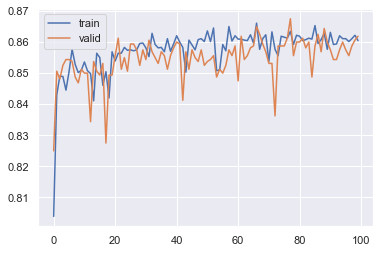

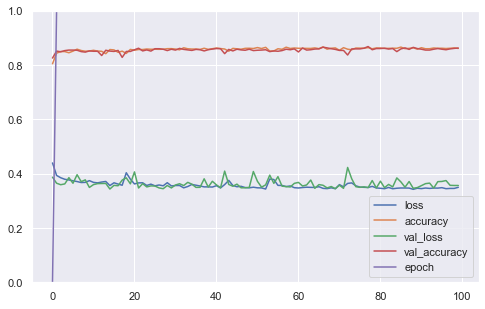

test accuracy: [0.34291551971435547, 0.867]


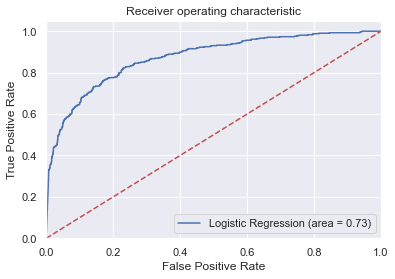

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.50      0.61       415

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Training accuracy [0.3383328202366829, 0.8655]

Testing accuracy [0.34291551971435547, 0.867]

Confusion Matrix


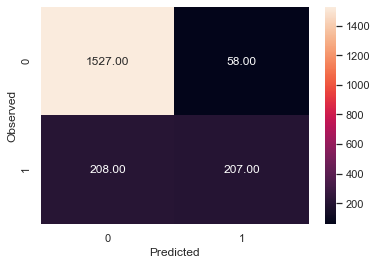

None

Recall: 0.4987951807228916

Precision: 0.7811320754716982

F1 Score: 0.6088235294117648

Roc Auc Score: 0.7311010603929915


In [96]:
hist = fit_predict_analyze(k_init='normal', act_method='relu', learn_rate=0.1, momentum=0.2, 
                       epoch_size=100, val_split=0.2, batch_size=50, optimizer_name='Nadam')

In [97]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.439102,0.803906,0.386715,0.825000,0
1,0.393248,0.842969,0.364548,0.850625,1
2,0.384726,0.849063,0.359009,0.848125,2
3,0.379048,0.848906,0.362029,0.852500,3
4,0.376580,0.844531,0.385074,0.854375,4
...,...,...,...,...,...
95,0.348168,0.861094,0.371073,0.857500,95
96,0.344460,0.860156,0.374341,0.855625,96
97,0.345370,0.861094,0.356761,0.858750,97
98,0.345388,0.862188,0.356219,0.860625,98


### Model evaluation

- The first set of hyperparameters provided better Recall and that is what is need to perform better as explained below.

- We got a training and test accuracy of approximately 0.86 

- Observation of the confusion matrix
True Positives (TP): we correctly predicted that they will take personal loans 210
True Negatives (TN): we correctly predicted that they will not take personal loan 1508
False Positives (FP): we incorrectly predicted that they will take exit (a "Type I error") 77 Falsely predict positive Type I error
False Negatives (FN): we incorrectly predicted that they will not take exit (a "Type II error") 205 Falsely predict negative Type II error

We shall make sure that the model shall provide high recall score (reduce type 2 error) 
since we do not want to incorrect predict that a customer will not exit. 
We need to get this number low given the data we have. Since the model with different hyperparameters converge to
have a recall of 0.49, looks like the data we have will provide no better results than approximately the following
scores:
- Recall: 0.5
- Precision: 0.74
- F1 Score: 0.6
- Roc Auc Score: 0.73


Model convergance observation: The model started to converge on a much lower epoch. We shall tune the model with different hyper parameters to
get the score high, specially lowering Type 2 error


### Model understanding
#### And here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix. How to determine if our model has done well…? Well first have a look at the accuracy, 86% accuracy is not a small thing, but we know from the data that the number of exit to non-exit percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed. With finding the best hyper-parameters using grid search, we did very low boost in the scoring

##### We will look upon the error types now:
- True Positives (TP): we correctly predicted that they will exit 223
- True Negatives (TN): we correctly predicted that they will not exit 1489
- False Positives (FP): we incorrectly predicted that they will exit (a "Type I error") 96 Falsely predict positive Type I error
- False Negatives (FN): we incorrectly predicted that they will not exit (a "Type II error") 192 Falsely predict negative Type II error
  -- In our case, the null hypothesis presents the exit case, while the alternate hypothesis is the non-exit one.
We must concentrate upon or reduce type II error here since we are interested in the customers who had actually exited, but our model predicted that they will not exit.

#### Eventually, we can concentrate upon our confusion matrix and look for the False Negatives which in this case is 192, less the number of False Negatives, wiser our model will be or we can directly look upon the recall for ‘1’ which in this case is 54%. So, in this case, out of the total number of customers who actually exited our model is only able to pick 49.87% of customers of them to be correctly predicted.

#### We will also compare the area under roc curve to determine how our model performs. In this case, the area comes out to be around 74% which is good.

Predicted that customer who are interested in buying personal loan will be reached and provided the loan

Here the bank wants to reach customers who exited but our model predicted they will not exit i.e. less number of False Negative, if FN is high, bank would lose on prospect customers. So that the bank doesn't lose money who are willing to take exit. Hence Recall is the important metric.

In case of False positive, bank will lose effort to reach out to a few people but that okay because the bank thought that these people will take exit but they did not. This number is quite low i.e. 96 and the precision is quite high 69%

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will exit. They can use the model preiodically to avoid customer's churn.


### Let see if we can extract a better performance using different different kernel initializer weight

In [99]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    
    # Initialize the constructor
    model = Sequential()

    # Add an first hidden layer 
    model.add(Dense(50, activation='relu', kernel_initializer='normal', input_dim = X_train.shape[1]))
    # model.add(Dropout(0.1))

    # second hidden layer
    model.add(Dense(20, activation='relu', kernel_initializer=init_mode))
    # model.add(Dropout(0.1))

    # Add an output layer with one neuron and no activation specified since we have a binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Nadam(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=50, verbose=0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855626 using {'init_mode': 'he_uniform'}
0.850750 (0.002183) with: {'init_mode': 'uniform'}
0.853250 (0.007210) with: {'init_mode': 'lecun_uniform'}
0.847126 (0.006001) with: {'init_mode': 'normal'}
0.797251 (0.003854) with: {'init_mode': 'zero'}
0.838750 (0.003589) with: {'init_mode': 'glorot_normal'}
0.852251 (0.004556) with: {'init_mode': 'glorot_uniform'}
0.832128 (0.025582) with: {'init_mode': 'he_normal'}
0.855626 (0.007411) with: {'init_mode': 'he_uniform'}


In [75]:
# Even with different weight initializer, we are getting the same accuracy of ~0.86. We will stick to the original 
# model and model evaluation report above